In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline 

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing data
sales=pd.read_csv('/Users/montu/Downloads/Git/AmazonSales/Amazon Sales data.csv')
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
sales.shape


(100, 14)

In [6]:
sales.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
#labelencoding
from sklearn.preprocessing import LabelEncoder
labenc=LabelEncoder
sales.iloc[:,3] = labenc().fit_transform(sales.iloc[:,3].values)
sales


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,0,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,1,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,0,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,1,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,0,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,1,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,0,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,0,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,0,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [9]:
#checking for null values 
sales.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

Text(0.5, 1.0, '% Distribution of orders in Regions')

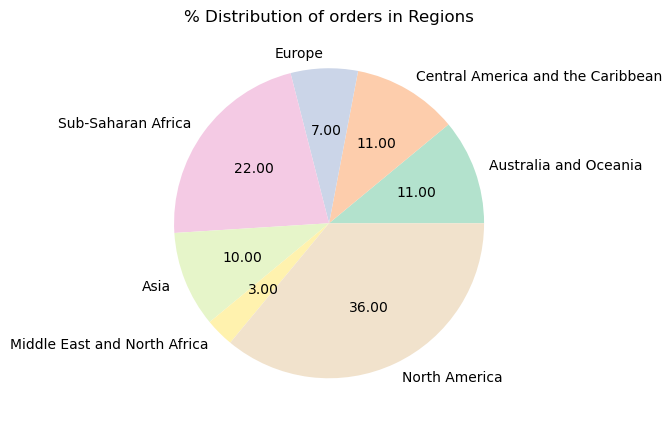

In [10]:
#Region wise distribution of total orders
plt.figure(figsize=(5,7))
plt.pie(sales.groupby('Region').size(), labels=sales['Region'].unique(),colors= plt.cm.Pastel2.colors, autopct='%.2f')
plt.title("% Distribution of orders in Regions", fontsize=12)

Conclusion 1: North America Region has the biggest share in number of orders placed

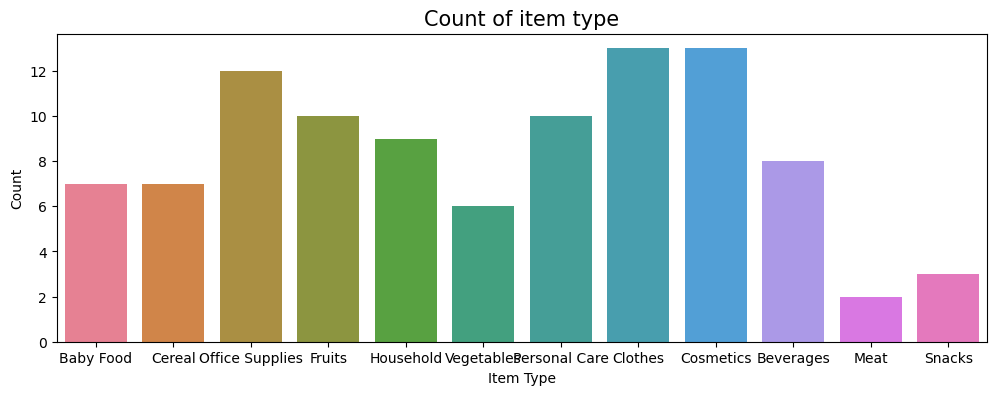

In [12]:
#counting the number of units sold of each item type
plt.figure(figsize=(12,4))

sns.countplot(x='Item Type', data=sales, palette='husl')
plt.title('Count of item type', fontsize=15)
plt.xlabel('Item Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

Conclusion 2: Clothes and Cosmetics has sold equal units in all regions combined

In [27]:
#finding season of most orders
#converting ship date to datetime format and grouping by months
#calculating total revenue in each month
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'], errors='coerce')
months= sales['Ship Date'].dt.month.unique()
monthlyrev= sales.groupby(sales['Ship Date'].dt.month)['Total Revenue'].sum()
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Monthly revenue
0,Australia and Oceania,Tuvalu,Baby Food,0,H,5/28/2010,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,NaN
1,Central America and the Caribbean,Grenada,Cereal,1,C,8/22/2012,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8884502.45
2,Europe,Russia,Office Supplies,0,L,5/2/2014,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,21105331.41
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,1,C,6/20/2014,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,11322021.69
4,Sub-Saharan Africa,Rwanda,Office Supplies,0,L,2/1/2013,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,7402746.81


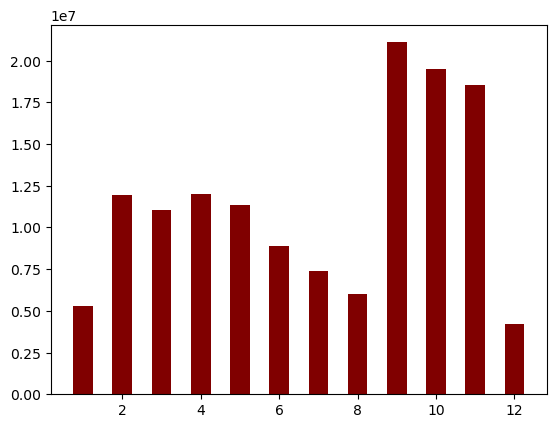

In [29]:
#bar plot for monthly revenue
plt.bar(months, monthlyrev, color='maroon', width=0.5)
plt.show()

Conclusion 3: Month of September has the highest sales

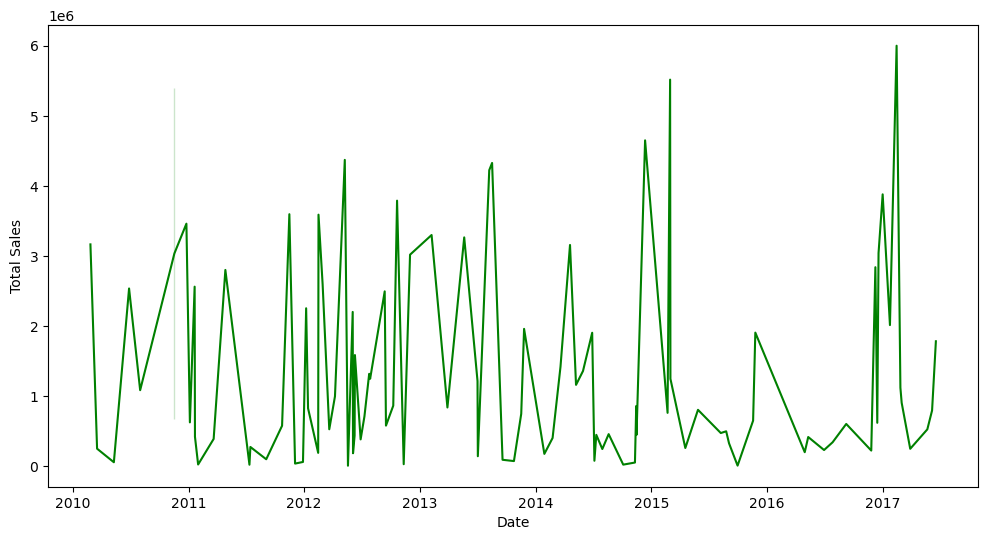

In [34]:
#daywise rise and fall in sales
plt.figure(figsize=(12,6))
sales.sort_values(by='Ship Date')
sns.lineplot(x='Ship Date', y='Total Revenue', data=sales, color='g')
plt.xlabel('Date', fontsize= 10)
plt.ylabel('Total Sales', fontsize= 10)
plt.show()

Conclusion 4: The highest levels of fluctuations in Total Revenue happened between 2012 and 2013